In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


# The Gaussian-Mixture-Model and the Expectation-Maximation Algorithm

### Libraries

In [2]:
import numpy as np
import pandas as pd
from numpy.linalg import slogdet, inv

import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
plt.rcParams['figure.figsize'] = (4, 3)
plt.rcParams['figure.dpi'] = 150

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Load Dataset

Mouse dataset: https://github.com/elki-project/elki/blob/master/data/synthetic/Vorlesung/mouse.csv

In [3]:
########################################################
## Number of clusters: 4
########################################################
## Cluster: Head
########################################################
## Size: 290
## Clipping: [0.00000000 0.00000000] - [1.00000000 1.00000000]
## Density correction factor: 1.0
## Generators:
##   Normal Distribution (mean=0.5, stddev=0.2)
##   Normal Distribution (mean=0.5, stddev=0.2)
## Discards: 203 Retries left: 986
## Density correction factor estimation: 1.1789181692094313
########################################################
## Cluster: Ear_left
########################################################
## Size: 100
## Clipping: [0.00000000 0.00000000] - [1.00000000 1.00000000]
## Density correction factor: 1.0
## Generators:
##   Normal Distribution (mean=0.25, stddev=0.05)
##   Normal Distribution (mean=0.75, stddev=0.05)
## Discards: 8 Retries left: 1000
## Density correction factor estimation: 0.7489597780859918
########################################################
## Cluster: Ear_right
########################################################
## Size: 100
## Clipping: [0.00000000 0.00000000] - [1.00000000 1.00000000]
## Density correction factor: 1.0
## Generators:
##   Normal Distribution (mean=0.75, stddev=0.05)
##   Normal Distribution (mean=0.75, stddev=0.05)
## Discards: 7 Retries left: 1000
## Density correction factor estimation: 0.7420249653259363
########################################################
## Cluster: Noise
########################################################
## Size: 10
## Density correction factor: 50.0
## Generators:
##   Uniform Distribution (min=0.0, max=1.0)
##   Uniform Distribution (min=0.0, max=1.0)
## Discards: 3 Retries left: 1000
## Density correction factor estimation: 0.9015256588072122
########################################################

### Mouse Dataset

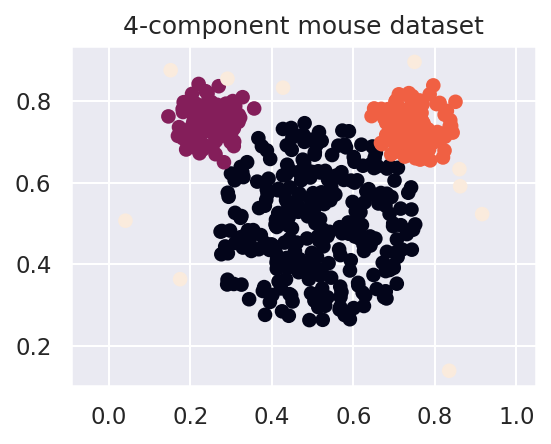

In [4]:
data = np.genfromtxt('/content/drive/My Drive/Colab Notebooks/bayesian_methods/data/mouse.txt', delimiter=", ")
df = pd.DataFrame({'X': data[:,0], 'Y': data[:,1], 'class': data[:,2]})
plt.scatter(x=df["X"], y=df["Y"], c=df["class"])
plt.title('4-component mouse dataset')
plt.axis('equal')
plt.show()

## General Expectation Maximation Algorithm

The general goal of learning is to maximize the likelihood $p(X|\theta)$ of a dataset given the parameters $\theta$. In most cases it is more convenient to maximize the log-likelihood $\log p(X|\theta)$, since products are converted to sums.

Assuming iid data points and by introducing a latent variable, the log-likelihood can be written as

$\log p(X|\theta) = \sum_i log p(x_i|\theta) = \sum_{i} \log \sum_{c}p(x_i, t_i=c| \theta)$

Now, instead of maximizing the complicated log-likelihood $p(X|\theta)$, we want to maximize a simpler lower bound. By inserting $1 = \frac{q(t_i=c)}{q(t_i=c)}$ we have

$\log p(X|\theta) = \sum_{i} \log \sum_{c}q(t_i=c) \frac{p(x_i, t_i=c| \theta)}{q(t_i=c)} = \sum_i \log \mathbb E_{q(t_i)} \left( \frac{p(X,t_i|\theta)}{q(t_i)}\right)$

Applying the [Jenson inequality](https://en.wikipedia.org/wiki/Jensen%27s_inequality), leads to a lower bound $\mathcal L(\theta, q)$

$\log p(X|\theta) = \sum_i \mathbb E_{q(t_i)} \left( \frac{p(X,t_i|\theta)}{q(t_i)}\right) \geq \mathcal L (\theta, q) = \sum_i \mathbb E_{q(t_i)} \log \left( \frac{p(X,t_i|\theta)}{q(t_i)}\right)$

### The EM-algorithm

The lower bound $\mathcal L (\theta, q)$ now is maximized in two steps. In the first step, called the **expectation step**,  we vary $q(t_i)$ while $\theta$ is kept fix. 

It can be shown, that the gap $\Delta$ between the log-likelihood $p(X|\theta)$ and the lower bound $\mathcal L$ is given by the Kullback-Leibler divergence

$\Delta = \log p(X|\theta) - \mathcal L(\theta, q) = \mathcal{KL}\left(q(t_i) || p(t_i| x_i, \theta)\right)$

which is minimized by setting $q(t_i) = p(t_i| x_i, \theta)$.

In the second step, called the **maximization step**, the lower bound is maximized with fixed q:

$\mathcal L(\theta, q) = \sum_i \mathbb E_{q(t_i)} \log \left(p(X,t_i|\theta)\right) + const$

where the second term is constant w.r.t. $\theta$. The first term is usually concave and is easily maximized by gradient ascent.

## Summary

**E-step:**

$q^{k+1}(t_i) = p(t_i| x_i, \theta^k) = \frac{p(x_i|t_i, \theta^k) q^k(t_i)}{\sum_c p(x_i|t_i=c, \theta^k) q^k(t_i=c)}$

**M-step:**

$\theta^{k+1} = \text{argmax} \sum_i \mathbb E_{q^{k+1}(t_i)} \log \left(p(x_i,t_i|\theta^k)\right)$

## Gaussian Mixture Model
In Gaussian Mixture Models, the likelihood is given by a weighted sum of Gaussians 

$p(X|\theta) = \sum_c \pi_c \mathcal N (X; \mu_c, \sigma_c)$

By comparison to the latent variable approach above, we can interprete the values of the latent variable $t_i$ as the cluster components. 
####*Multivariate Gaussian PDF*

$\mathcal N (x; \mu, \Sigma) = \frac{1}{\sqrt{(2\pi)^d \det(\Sigma)}} \exp\left(-\frac 1 2 ({x}-{\mu})^\mathrm{T}{\Sigma}^{-1}({x}-{\mu})\right),\quad x, \mu \in \mathbb R^d, \Sigma \in \mathbb R^{d\times d}$

## Expectation Step

+ $p(t_i = c) = \pi_c$
+ $p(x_i | t_i = c, \theta) = \mathcal N (x; \mu_c, \Sigma_c)$
+ $q^{k+1}(t_i = c) = \gamma_{ic}$

This leads to the following update formula

+ $\gamma_{ic} = \frac{\pi_c \mathcal N (x_i; \mu_c, \Sigma_c)}{\sum_{c=1}
^C \pi_c \mathcal N (x_i; \mu_c, \Sigma_c)}$

For numerical reasons, we rewrite the expression in the following way

+ $\gamma_{ic} = \frac{\exp(y_{ic})}{\sum_{c=1}
^C \exp(y_{ic})} = \frac{\exp(y_{ic} - \max(y))}{\sum_{c=1}
^C \exp(y_{ic} - \max(y))}$

where $y_{ic}$ is given by

$y_{ic} = \log \pi_c -\frac 1 2 \left(({x_i}-{\mu_c})^\mathrm{T}{\Sigma_c}^{-1}({x_i}-{\mu_c}) + d \log 2 \pi + \log \det \Sigma_c \right)$

## Maximation Step

The maximization step

+ $\theta^{k+1} = \text{argmax} \sum_{ic} q(t_i = c) \log \left(p(x_i,t_i=c|\theta^k)\right) = \text{argmax} \sum_{ic} \gamma_{ic}\left(\log \pi_{c} + \log \mathcal N (x_i; \mu_c, \Sigma_c)\right)$

can be performed analytically by solving the following equations

+ $\nabla_{\mu_{c}} \sum_{ik} \gamma_{ik} \log \left(\mathcal N (x; \mu_k, \Sigma_k)\right) = 0$
+ $\nabla_{\Sigma_{c}} \sum_{ik} \gamma_{ik} \log \left(\mathcal N (x; \mu_k, \Sigma_k)\right) = 0$

Additionally the priors $p(t_i = c) = \pi_c$ need to be updated by solving

+ $\nabla_{\nu} \left( \sum_{ic}  \gamma_{ic} \log \pi_c - \lambda \left(\sum_c \pi_c -1 \right)\right) = 0, \quad \nu = \pi_1, \pi_2, \pi_3, \lambda$

where the Lagrange multiplier is needed to normalize the weights $\pi_c$.

Finally, this leads to the following update formulas

+ $\pi_c = \frac{\sum_i \gamma_{ic}}{\sum_{ic} \gamma_{ic}} = \frac{1}{N}\sum_{i=1}^N \gamma_{ic}$

+ $\mathbf \mu_c = \frac{\sum_{i=1}^N \gamma_{c,i} \mathbf{x}_i}{\sum_{i=1}^N \gamma_{c,i}}$

+ $\Sigma_c = \frac{\sum_{i=1}^N \gamma_{c,i} (\mathbf{x}_i - \mathbf\mu_c) (\mathbf{x}_i - \mathbf{\mu}_1)^\top }{\sum_{i=1}^N \gamma_{c,i}}$

In [5]:
def get_Y(X, mu, sigma, pi):
  """
  Arguments:
  X: (N, d) -- dataset
  mu: (C, d) -- cluster means
  sigma: (C, d, d) -- cluster covariance matrices
  pi: (C, 1) -- cluster weights

  Returns:
  Y: (N, C) -- use for vlb or as argument in E_step
  """
  N, d = X.shape
  C = mu.shape[0]

  Y = np.zeros((N,C))
  
  for c in range(C):
    X_prime = X - mu[c]
    sig_inv = inv(sigma[c])
    for n in range(N):
      x_prime = X_prime[n]
      y = np.dot(sig_inv, x_prime)

      arg = np.dot(x_prime, y)
      arg += d * np.log(2 * np.pi)
      arg += slogdet(sigma[c])[1]
      arg *= -0.5

      arg += np.log(pi[c])
      Y[n, c] = arg
  
  return Y

In [6]:
def E_step(X, mu, sigma, pi):
  """
  Arguments:
  X: (N, d) -- dataset
  mu: (C, d) -- cluster means
  sigma: (C, d, d) -- cluster covariance matrices
  pi: (C, 1) -- cluster weights

  Returns:
  gamma: (N, C) -- posterior probabilities for each cluster and datapoint
  """
  N, d = X.shape
  C = pi.shape[0]

  gamma = np.zeros((N, C))
  pi = np.reshape(pi, (C, 1))

  Y = get_Y(X, mu, sigma, pi)
  max_Y = np.max(Y, axis=1, keepdims=True)

  Y_prime = Y - max_Y

  gamma = np.exp(Y_prime)
  gamma /= np.sum(gamma, axis=1, keepdims=True)

  return gamma

## Parameter initialization

Initialize $\pi_c \in [0, 1]$ with $\sum_c \pi_c = 1$

The means $\mu_c$ are initialized randomly, without any constraints.

The covariance matrices $\Sigma_c$ have to by positive semidefinite.



In [7]:
def initialize(C, d):
  """
  Arguments:
  C -- number of clusters
  d -- dimension of a single data point
  
  Returns:
  pi: (C, 1) -- cluster weights
  mu: (C, d) -- cluster means
  sigma: (C, d, d) -- cluster covariance matrices
  """
  pi = np.random.rand(C, 1)
  pi /= np.sum(pi, axis=0)

  mu = np.random.rand(C, d)

  sigma = np.zeros((C, d, d))
  for c in range(C):
    A = np.random.rand(d, d)
    sigma[c, :, :] = np.dot(A, A.T)
            
  return pi, mu, sigma

In [8]:
def M_step(X, gamma):
  """
  Arguments:
  X: (N, d) -- dataset
  gamma: (N, C) -- posterior probabilities for each cluster and datapoint

  Returns:
  mu: (C, d) -- cluster means
  sigma: (C, d, d) -- cluster covariance matrices
  pi: (C, 1) -- cluster weights
  """
  N, d = X.shape
  C = gamma.shape[1]
    
  pi = np.zeros((C, 1))
  mu = np.zeros((C, d))
  sigma = np.zeros((C, d, d))

  # Calculate cluster weights -- pi
  gamma_sum = np.sum(gamma, axis=0)
  pi = gamma_sum / N

  # Calculate gaussian parameters -- mu, sigma
  for c in range(C):
    gammac = np.reshape(gamma[:,c], (N,1))
    # Calculate mu
    mu[c] = np.sum(X*gammac, axis=0, keepdims=True)/gamma_sum[c]
    # Calculate sigma
    num = 0
    for n in range(N):
      x_prime = X[n] - mu[c]
      num += gammac[n]*np.outer(x_prime, x_prime)
    sigma[c] = num/gamma_sum[c]

  return pi, mu, sigma

### *Variational Lower Bound*

$\mathcal{L} = \sum_{i,c} \left( q(t_i =c) (\log \pi_c + \log \mathcal N(x_i; \mu_c, \Sigma_c)) - q(t_i =c) \log q(t_i =c) \right)$

$\mathcal{L} = \sum_{i,c}\left( \gamma_{i, c} y_{i,c} - \gamma_{i,c} \log \gamma_{i,c} \right)$

In [9]:
def compute_vlb(X, mu, sigma, pi, gamma):
  """
  Arguments:
  X: (N, d) -- dataset
  mu: (C, d) -- cluster means
  sigma: (C, d, d) -- cluster covariance matrices
  pi: (C, 1) -- cluster weights
  gamma: (N, C) -- posterior probabilities for each cluster and datapoint

  Returns:
  loss -- variational lower bown
  """
  N, d = X.shape
  C = pi.shape[0]

  Y = get_Y(X, mu, sigma, pi)
  loss = np.sum(np.sum(gamma*(Y - np.log(gamma))))

  return loss

In [10]:
def convergence(loss, loss_prev, rtol):
  """
  Arguments:
  loss -- new loss
  loss_prev -- previous loss
  rtol -- 

  Returns:
  conv -- boolean indicating convergence
  
  """
  increase = np.abs((loss - loss_prev)/loss_prev)
  conv = increase <= rtol

  return increase, conv

In [11]:
def train_EM(X, C, rtol=1e-3, max_iter=100, restarts=10):
    '''
    Arguments:
    X: (N, d) -- dataset
    C -- number of cluster components
    rtol -- stopping treshold
    max_iter -- maximum iteration
    restarts -- number of EM restarts with new randomly initialized parameters
    
    Returns:
    best_loss -- highest vlb 
    best_pi -- pi for highest vlb
    best_mu -- mu for highest vlb
    best_sigma -- sigma for highest vlb
    '''
    N, d = X.shape
    best_loss = None
    best_pi = None
    best_mu = None
    best_sigma = None

    for _ in range(restarts):
        try:
          pi, mu, sigma = initialize(C, d)
          for _ in range(max_iter):
            gamma = E_step(X, mu, sigma, pi)
            loss_prev = compute_vlb(X, mu, sigma, pi, gamma)
            pi, mu, sigma = M_step(X, gamma)
            loss = compute_vlb(X, mu, sigma, pi, gamma)

            _, conv = convergence(loss, loss_prev, rtol)
            if conv:
              break

          if best_loss == None or loss > best_loss:
            best_loss = loss
            best_pi = pi
            best_mu = mu
            best_sigma = sigma
            print("Loss = " + str(best_loss))
            
          print("Restart...")

        except np.linalg.LinAlgError:
            print("Singular Matrix")
            print("Restart...")
            pass

    return best_loss, best_pi, best_mu, best_sigma

In [12]:
best_loss, best_pi, best_mu, best_sigma = train_EM(data[:,0:2], 3)

Loss = 607.2264650188309
Restart...
Restart...
Loss = 607.6033277636855
Restart...
Restart...
Restart...
Restart...
Restart...
Restart...


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in multiply


Singular Matrix
Restart...
Loss = 608.3593641955767
Restart...


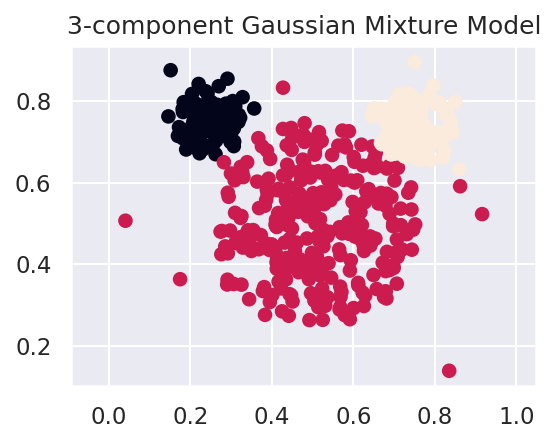

In [13]:
gamma = E_step(data[:,0:2], best_mu, best_sigma, best_pi)
labels = gamma.argmax(axis=1)
plt.scatter(x=df['X'], y=df['Y'], c=labels)
plt.title('3-component Gaussian Mixture Model')
plt.axis('equal')
plt.show()